In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf  

data = pd.read_csv('creditcard.csv')
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [2]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [3]:
print(data.columns)

print('\n\nnot fraud', round(data['Class'].value_counts()[0]/len(data) * 100,2), '%')
print('Fraud', round(data['Class'].value_counts()[1]/len(data) * 100,2), '%')

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


not fraud 99.83 %
Fraud 0.17 %


In [5]:
data['Class'].value_counts()[0]


np.int64(284315)

In [7]:
print("Percent of No Fraud rows", round(data['Class'].value_counts()[0]/len(data) * 100,2))
print("Percent of Fraud rows", round(data['Class'].value_counts()[1]/len(data) * 100,2))

Percent of No Fraud rows 99.83
Percent of Fraud rows 0.17


c:\Users\rituk\dev\venvs\crypt\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\Users\rituk\dev\venvs\crypt\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


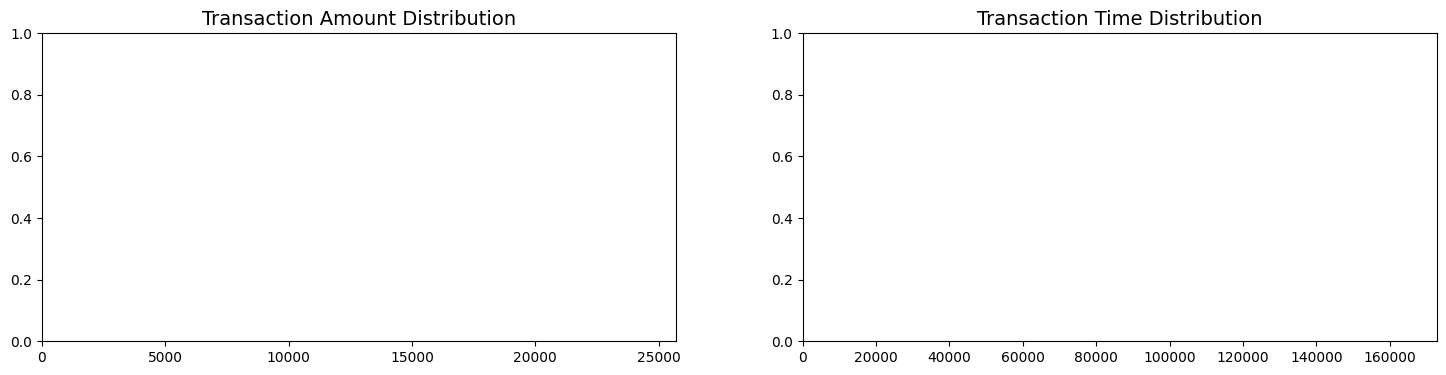

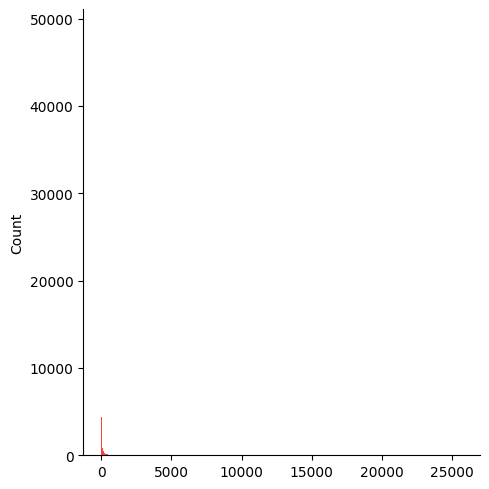

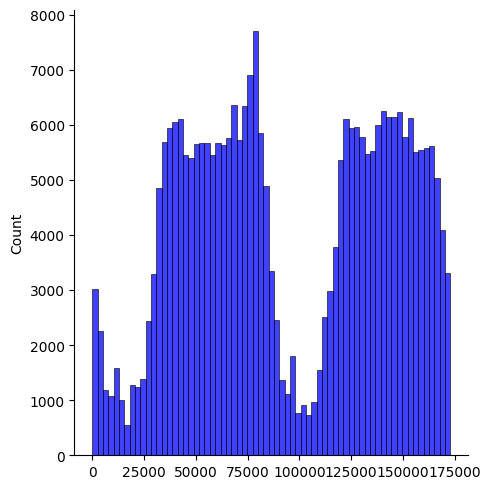

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_value = data['Amount'].values
time_value = data['Time'].values

sns.displot(amount_value, ax=ax[0], color='r')
ax[0].set_title('Transaction Amount Distribution', fontsize=14)
ax[0].set_xlim([min(amount_value), max(amount_value)])


sns.displot(time_value, ax=ax[1], color='b')
ax[1].set_title('Transaction Time Distribution', fontsize=14)
ax[1].set_xlim([min(time_value), max(time_value)])

plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler() 
rob_scaler = RobustScaler()

In [ ]:
data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)

In [16]:
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

data.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


Text(0.5, 1.0, 'Imbalanced Correlation Matrix')

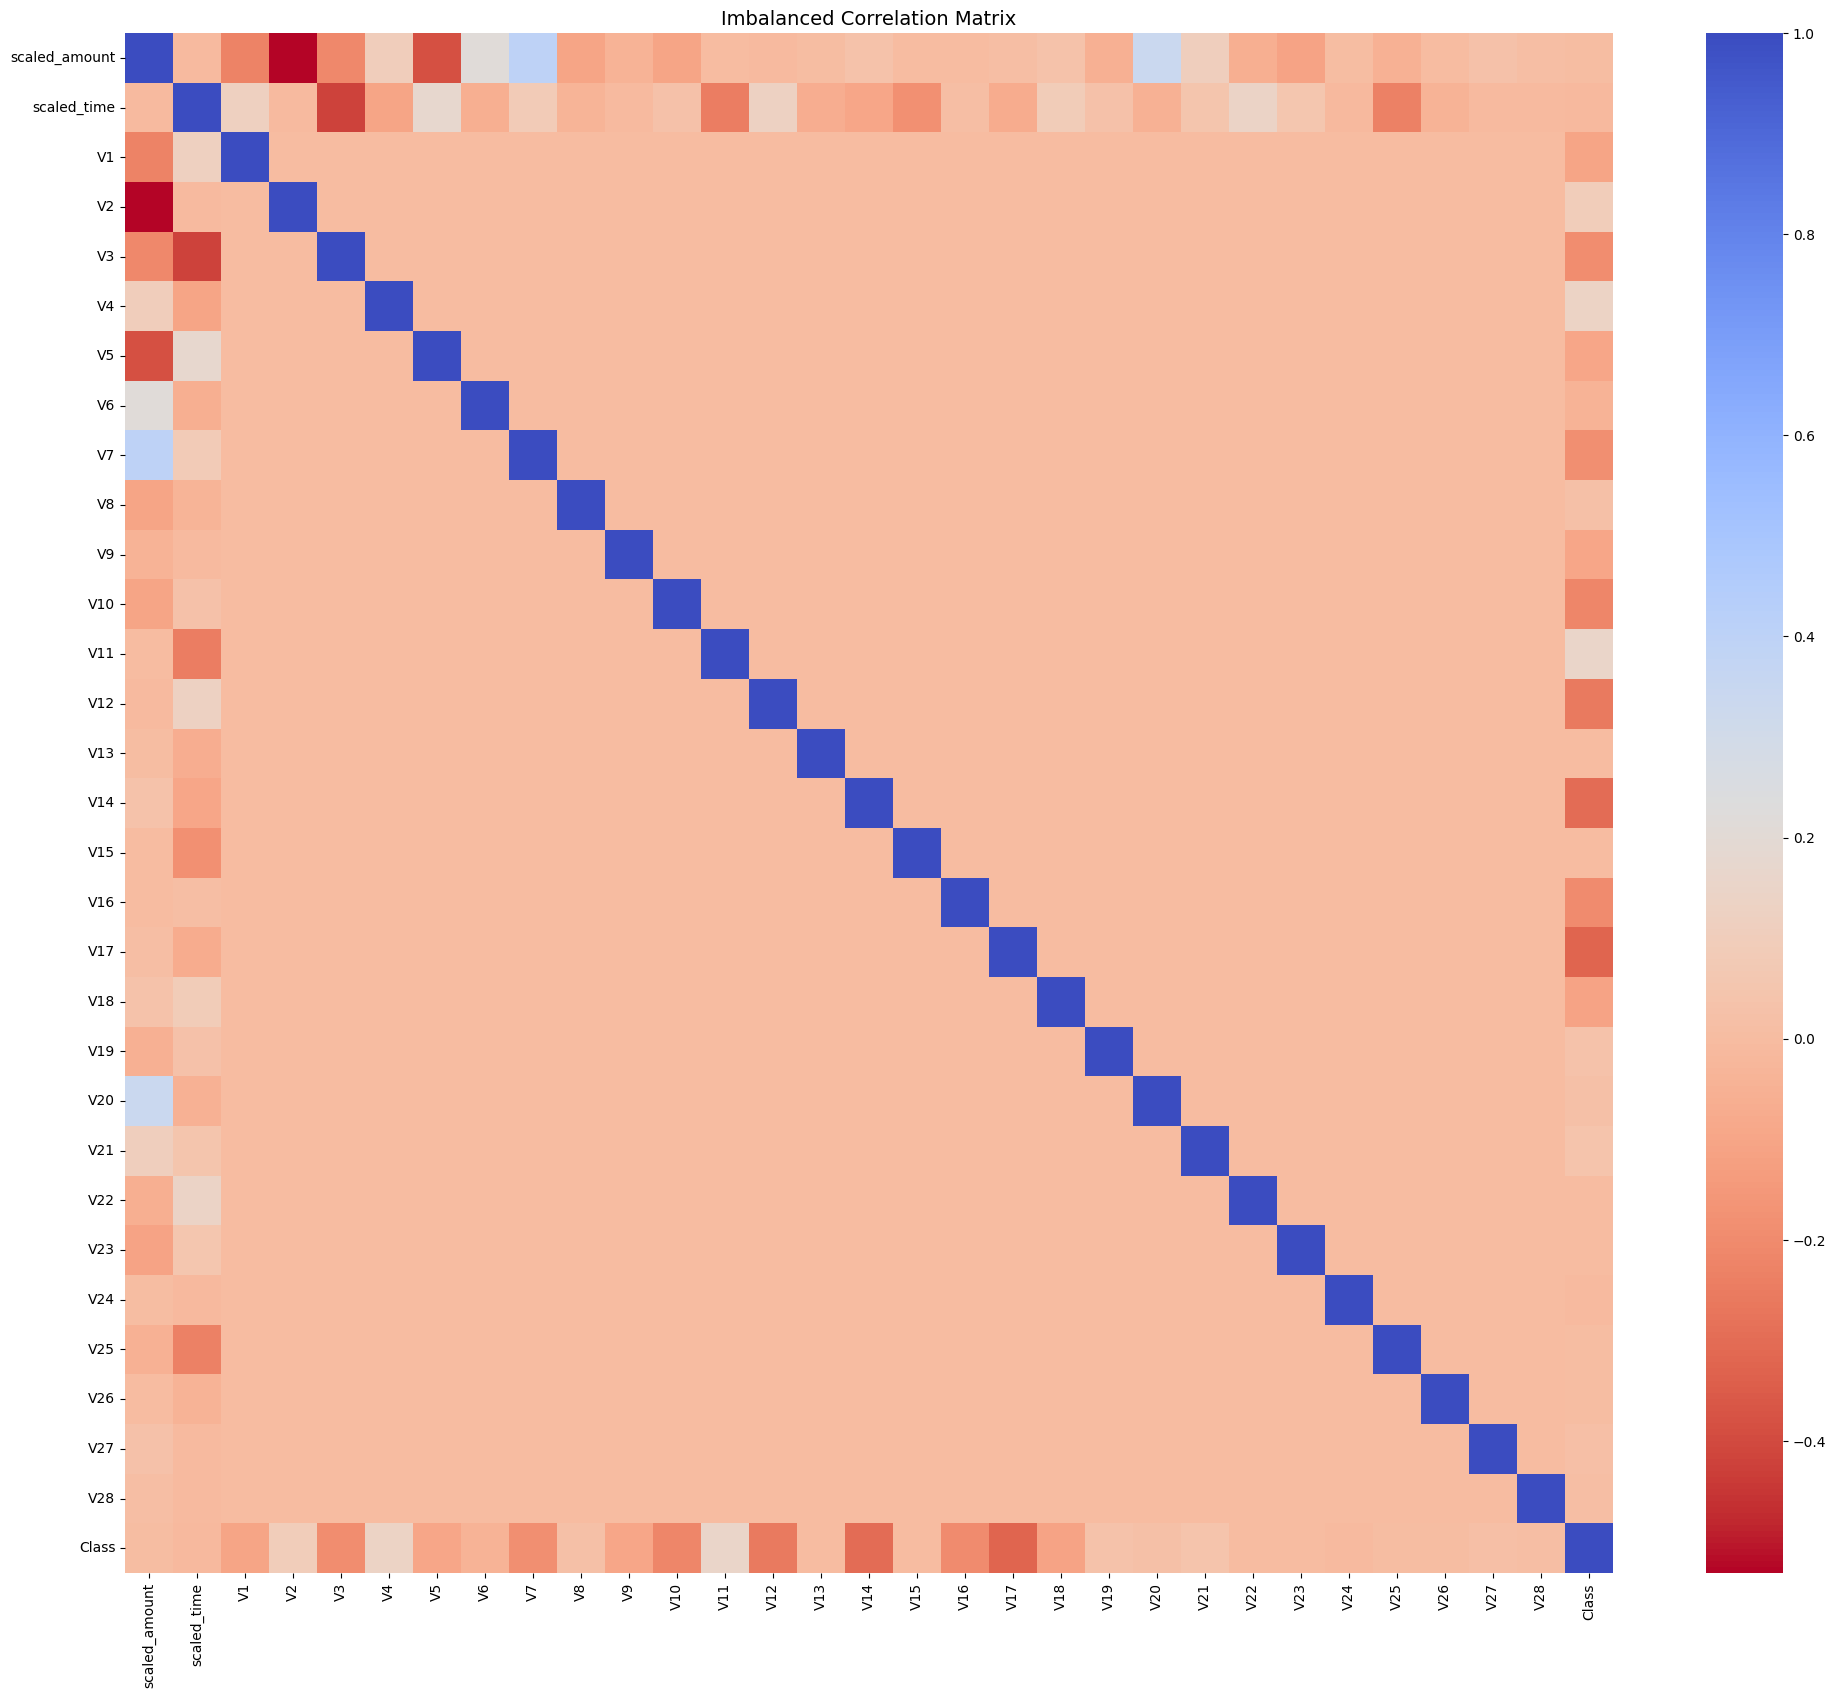

In [18]:
f, ax1 = plt.subplots(1,1,figsize=(24,20))

corr = data.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix", fontsize=14)

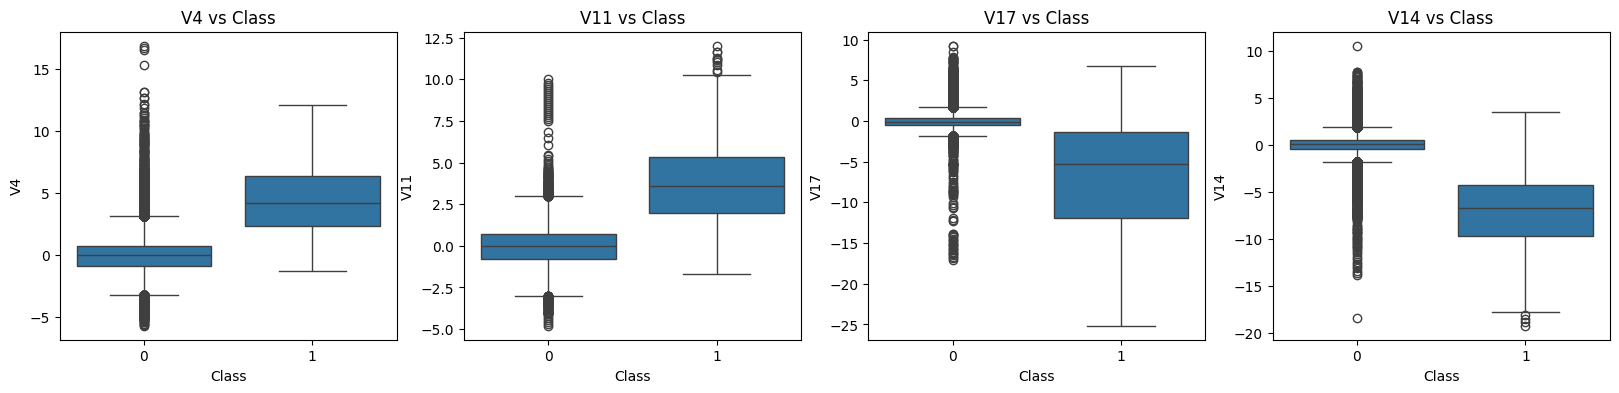

In [20]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V4", data=data, ax=axes[0])
axes[0].set_title("V4 vs Class")

sns.boxplot(x="Class", y="V11", data=data, ax=axes[1])
axes[1].set_title("V11 vs Class")

sns.boxplot(x="Class", y="V17", data=data, ax=axes[2])
axes[2].set_title("V17 vs Class")

sns.boxplot(x="Class", y="V14", data=data, ax=axes[3])
axes[3].set_title("V14 vs Class")
plt.show()

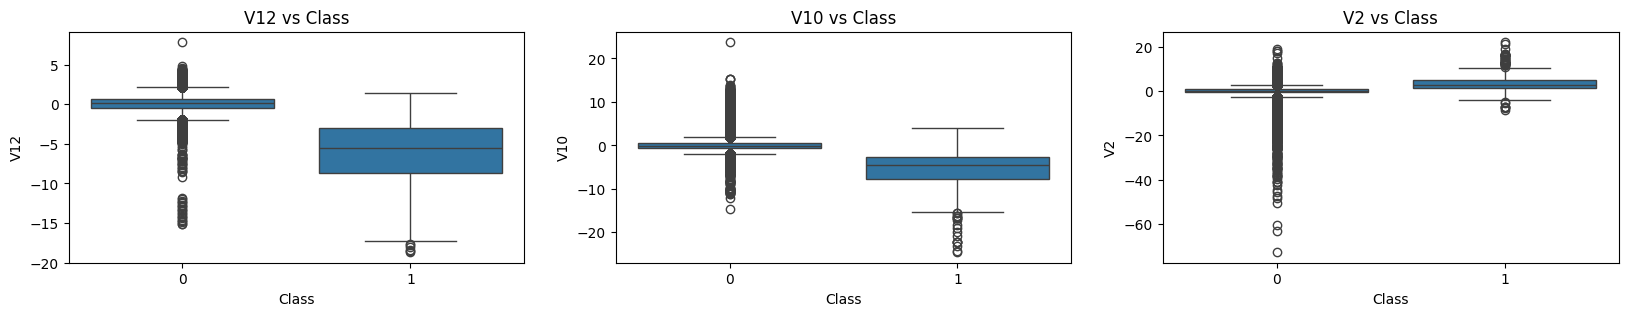

In [21]:
f, axes = plt.subplots(ncols=3, figsize=(20,3))

sns.boxplot(x="Class", y="V12", data=data, ax=axes[0])
axes[0].set_title("V12 vs Class")

sns.boxplot(x="Class", y="V10", data=data, ax=axes[1])
axes[1].set_title("V10 vs Class")

sns.boxplot(x="Class", y="V2", data=data, ax=axes[2])
axes[2].set_title("V2 vs Class")

plt.show()

In [22]:
len(data)

284807

In [23]:
v10_fraud = data['V10'].loc[data['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cutoff = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cutoff, q75 + v10_cutoff
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
data = data.drop(data[(data['V10'] > v10_upper) | (data['V10'] < v10_lower)].index)
print("No of instances after V10 outlier removal: {}".format(len(data)))
print('V10 outliers:{}'.format(outliers))

v12_fraud = data['V12'].loc[data['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cutoff = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cutoff, q75 + v12_cutoff
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
data = data.drop(data[(data['V12'] > v12_upper) | (data['V12'] < v12_lower)].index)
print("No of instances after V12 outlier removal: {}".format(len(data)))
print('V12 outliers:{}'.format(outliers))

v14_fraud = data['V14'].loc[data['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
v14_iqr = q75 - q25

v14_cutoff = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cutoff, q75 + v14_cutoff
outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
data = data.drop(data[(data['V14'] > v14_upper) | (data['V14'] < v14_lower)].index)
print("No of instances after V14 outlier removal: {}".format(len(data)))
print('V14 outliers:{}'.format(outliers))


No of instances after V10 outlier removal: 283427
V10 outliers:[np.float64(-16.6496281595399), np.float64(-18.2711681738888), np.float64(-15.5637913387301), np.float64(-15.5637913387301), np.float64(-16.7460441053944), np.float64(-22.1870885620007), np.float64(-22.1870885620007), np.float64(-22.1870885620007), np.float64(-22.1870885620007), np.float64(-17.1415136412892), np.float64(-16.3035376590131), np.float64(-16.2556117491401), np.float64(-16.6011969664137), np.float64(-18.9132433348732), np.float64(-20.9491915543611), np.float64(-19.836148851696), np.float64(-23.2282548357516), np.float64(-24.4031849699728), np.float64(-24.5882624372475)]
No of instances after V12 outlier removal: 283413
V12 outliers:[np.float64(-17.7691434633638), np.float64(-17.6316063138707), np.float64(-17.2286622386187), np.float64(-17.1313009454468), np.float64(-18.0475965708216), np.float64(-18.6837146333443), np.float64(-18.5536970096458), np.float64(-18.4311310279993), np.float64(-17.1829184301947), np.fl

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split

print('\n\nnot fraud', round(data['Class'].value_counts()[0]/len(data) * 100,2), '%')
print('Fraud', round(data['Class'].value_counts()[1]/len(data) * 100,2), '%\n\n\n')

X = data.drop('Class', axis=1)
y = data['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train data idx:", train_index, "Test data idx:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('\n\n')

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))



not fraud 99.84 %
Fraud 0.16 %



Train data idx: [ 30206  30237  30260 ... 282977 282978 282979] Test data idx: [    0     1     2 ... 56649 56650 56651]
Train data idx: [     0      1      2 ... 282977 282978 282979] Test data idx: [ 30206  30237  30260 ... 113238 113239 113240]
Train data idx: [     0      1      2 ... 282977 282978 282979] Test data idx: [ 79049  79348  79386 ... 169835 169836 169837]
Train data idx: [     0      1      2 ... 282977 282978 282979] Test data idx: [146588 146645 148170 ... 226397 226398 226399]
Train data idx: [     0      1      2 ... 226397 226398 226399] Test data idx: [214528 214559 217006 ... 282977 282978 282979]



Label Distributions: 

[0.99839211 0.00160789]
[0.99839211 0.00160789]


In [25]:
data = data.sample(frac=1)

fraud_data = data.loc[data['Class'] == 1]
non_fraud_data = data.loc[data['Class'] == 0][:492]

normal_distributed_data = pd.concat([fraud_data, non_fraud_data])
new_data = normal_distributed_data.sample(frac=1, random_state=42)

new_data.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
154231,-0.098512,0.190698,1.956425,-0.453800,0.264884,0.572413,-1.032588,-0.391148,-1.002996,-0.018095,...,-0.233808,-0.110599,0.068040,0.337003,-0.054377,-0.648411,0.446270,-0.038560,-0.044302,0
37021,0.211835,-0.539492,-3.293273,-3.186220,0.790301,-1.713629,1.756260,-2.409754,0.240279,-0.478559,...,-1.347343,-0.320312,0.860640,2.033746,0.369042,0.753974,0.007755,0.268753,-0.558354,0
122479,2.763921,-0.095361,-5.622469,3.480623,-6.200677,4.311234,-5.226286,-1.341764,-5.220941,2.682844,...,-0.156289,0.949569,-0.428986,-0.350676,0.197550,0.159234,-0.377791,-0.213562,0.459529,1
191544,0.823028,0.524160,0.054682,1.856500,-4.075451,4.100098,-0.800931,-0.292502,-2.317431,1.189747,...,0.509559,0.618248,0.800932,0.130016,0.288946,-0.366658,0.030307,0.431182,0.110698,1
141260,6.850416,-0.005733,-1.927453,1.827621,-7.019495,5.348303,-2.739188,-2.107219,-5.015848,1.205868,...,2.172709,1.376938,-0.792017,-0.771414,-0.379574,0.718717,1.111151,1.277707,0.819081,1


In [26]:
print('Distribution of the classes in the subsample dataset')
print(new_data['Class'].value_counts()/len(new_data))
print(new_data.shape)

X_new = new_data.drop('Class', axis=1)
Y_new = new_data['Class']

Distribution of the classes in the subsample dataset
Class
0    0.519535
1    0.480465
Name: count, dtype: float64
(947, 31)


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

print("Length of X train: {} | Length of y train: {}".format(len(original_Xtrain), len(original_ytrain)))
print("Length of X test: {} | Length of y test: {}\n".format(len(original_Xtest), len(original_ytest)))

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []

logistic_reg = LogisticRegression()
logistic_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver':['liblinear']}
random_logistic_reg = RandomizedSearchCV(LogisticRegression(), logistic_reg_params, n_iter=4)

for train, test in sss.split(original_Xtrain, original_ytrain):
  pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), random_logistic_reg)
  model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
  best_estim = random_logistic_reg.best_estimator_
  prediction = best_estim.predict(original_Xtrain[test])

  accuracy_list.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
  precision_list.append(precision_score(original_ytrain[test], prediction))
  recall_list.append(recall_score(original_ytrain[test], prediction))
  f1_list.append(f1_score(original_ytrain[test], prediction))
  auc_list.append(roc_auc_score(original_ytrain[test], prediction))

print("accuracy: {}".format(np.mean(accuracy_list)))
print("precision: {}".format(np.mean(precision_list)))
print("recall: {}".format(np.mean(recall_list)))
print("f1: {}".format(np.mean(f1_list)))

Length of X train: 226384 | Length of y train: 226384
Length of X test: 56596 | Length of y test: 56596

accuracy: 0.9395188343278174
precision: 0.046875999685450864
recall: 0.911986301369863
f1: 0.08794507004976082


In [29]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_estim.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.98      0.99     56505
       Fraud       0.06      0.88      0.11        91

    accuracy                           0.98     56596
   macro avg       0.53      0.93      0.55     56596
weighted avg       1.00      0.98      0.99     56596



In [30]:
from sklearn.metrics import average_precision_score

y_score = best_estim.decision_function(original_Xtest)
avg_precision = average_precision_score(original_ytest, y_score)

print("Average PR score: {0:0.2f}".format(avg_precision))

Average PR score: 0.70


Text(0.5, 1.0, 'SMOTE PR curve: \n Average PR score=0.70')

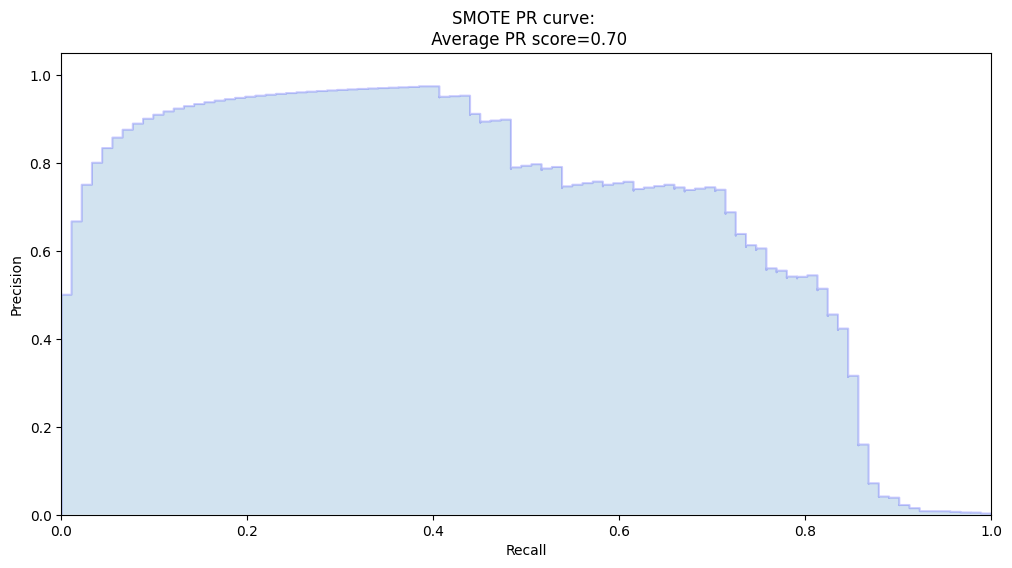

In [31]:
from sklearn.metrics import precision_recall_curve

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('SMOTE PR curve: \n Average PR score={0:0.2f}'.format(avg_precision))

In [32]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [35]:
smote = SMOTE(sampling_strategy='minority', random_state=42)
Xsmote_train, ysmote_train = smote.fit_resample(original_Xtrain, original_ytrain)
logistic_reg.fit(Xsmote_train, ysmote_train)

LogisticRegression()

In [36]:
from sklearn.metrics import accuracy_score

y_predict_smote = best_estim.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_predict_smote)
print("SMOTE score: {0:0.3f}".format(oversample_score))

SMOTE score: 0.978


In [39]:
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense

n_inputs = Xsmote_train.shape[1]

model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(Xsmote_train, ysmote_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)


Epoch 1/20
1206/1206 - 5s - 4ms/step - accuracy: 0.9683 - loss: 0.0812 - val_accuracy: 0.9875 - val_loss: 0.0351
Epoch 2/20
1206/1206 - 2s - 2ms/step - accuracy: 0.9960 - loss: 0.0174 - val_accuracy: 0.9998 - val_loss: 0.0094
Epoch 3/20
1206/1206 - 3s - 2ms/step - accuracy: 0.9982 - loss: 0.0093 - val_accuracy: 0.9998 - val_loss: 0.0074
Epoch 4/20
1206/1206 - 2s - 2ms/step - accuracy: 0.9987 - loss: 0.0062 - val_accuracy: 1.0000 - val_loss: 0.0056
Epoch 5/20
1206/1206 - 3s - 2ms/step - accuracy: 0.9991 - loss: 0.0047 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 6/20
1206/1206 - 2s - 2ms/step - accuracy: 0.9993 - loss: 0.0037 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 7/20
1206/1206 - 2s - 2ms/step - accuracy: 0.9994 - loss: 0.0032 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 8/20
1206/1206 - 2s - 2ms/step - accuracy: 0.9995 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 9.9360e-04
Epoch 9/20
1206/1206 - 2s - 2ms/step - accuracy: 0.9995 - loss: 0.0027 - val_accuracy: 1.000

In [ ]:
import numpy as np

predictions = model.predict(original_Xtest, batch_size=200, verbose=0)

fraud_predictions = np.argmax(predictions, axis=1)


In [44]:
from sklearn.metrics import confusion_matrix

smote_cm = confusion_matrix(original_ytest, fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

print("SMOTE confusion matrix:\n",smote_cm,"\n\nActual confusion matrix:\n", actual_cm)

SMOTE confusion matrix:
 [[56493    12]
 [   28    63]] 

Actual confusion matrix:
 [[56505     0]
 [    0    91]]
